## Trabalho 2

#### 1) Importação das Bibliotecas

In [20]:
# Importação das bibliotecas
import pandas as pd
import plotly as plt
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import json
import statistics as st
from os import listdir
import math as math

#### 2) Importação da Base de Dados

In [2]:
# Definindo a pasta com as pastas de textos
main_folder = "c:/Users/Usuario/Documents/Unicamp/Mestrado/Disciplinas/FT045 - Tópicos em Tecnologia para Informação II/Trabalho 2/bbc"
# Coletando as pastas
folders = listdir(main_folder)
# Coletando todos os arquivos
files_paths = []
for i in folders:
    new_folder = main_folder+"/"+i
    raw_files = listdir(new_folder)
    files = [new_folder+"/"+j for j in raw_files]
    files_paths.append(files)

In [3]:
# Criando lista com todos os textos por categoria
texts_business = [open(i, "r").read().replace('\n', '') for i in files_paths[0]]
texts_entertainment = [open(i, "r").read().replace('\n', '') for i in files_paths[1]]
texts_politics = [open(i, "r").read().replace('\n', '') for i in files_paths[2]]
texts_tech = [open(i, "r").read().replace('\n', '') for i in files_paths[4]]

In [4]:
# Criando lista com todos os textos por categoria
texts_business_raw = [open(i, "r").read().split("\n\n") for i in files_paths[0]]
texts_entertainment_raw = [open(i, "r").read().split("\n\n") for i in files_paths[1]]
texts_politics_raw = [open(i, "r").read().split("\n\n") for i in files_paths[2]]
texts_tech_raw = [open(i, "r").read().split("\n\n") for i in files_paths[4]]

#### 3) Tratamento dos Dados

In [5]:
# Criando listas flats, sendo cada elemento um parágrafo
texts_business = [j.replace("\n", "") for i in texts_business_raw for j in i]
texts_entertainment = [j.replace("\n", "") for i in texts_entertainment_raw for j in i]
texts_politics = [j.replace("\n", "") for i in texts_politics_raw for j in i]
texts_tech = [j.replace("\n", "") for i in texts_tech_raw for j in i]

In [6]:
# Criando listas flats, sendo cada elemento um parágrafo
texts_business = [j.replace("\n", "") for i in texts_business_raw for j in i]
texts_entertainment = [j.replace("\n", "") for i in texts_entertainment_raw for j in i]
texts_politics = [j.replace("\n", "") for i in texts_politics_raw for j in i]
texts_tech = [j.replace("\n", "") for i in texts_tech_raw for j in i]

In [7]:
# Limpando títulos
texts_business = [i for i in texts_business if len(i) > 100]
texts_entertainment = [i for i in texts_entertainment if len(i) > 100]
texts_politics = [i for i in texts_politics if len(i) > 100]
texts_tech = [i for i in texts_tech if len(i) > 100]

In [8]:
# Criando uma lista com os textos
texts = [texts_business, texts_entertainment, texts_politics, texts_tech]

#### 4) Definição das Funções de Cálculo do Fingerprint

In [9]:
def text_fingerprint(text, n):
    # Inicializando o vetor de fingerprint
    fingerprint = []
    # Definindo o tamanho do bloco
    while len(text) != 0:
        if n <= len(text):
            block = text[0:n]
            text = text[n:]
        else:
            block = text
            text = []
        plain_text = "".join(block).split(".")
        size = [len(i.encode('utf-8')) for i in plain_text]
        fingerprint.append(round(st.mean(size), 2))
    return fingerprint

In [142]:
def fingerprint_matrix(text, n):
    # Inciializando o fingerprint
    fingerprint = text_fingerprint(text, n)
    # Achando o primeiro quadrado prefeito
    min_square = int(round(math.sqrt(len(fingerprint)), 0))+1
    # Encontrando o total de elementos adicionais
    elementos_adicionais = min_square**2 - len(fingerprint)
    # Adicionando os elementos
    fingerprint.extend([""]*elementos_adicionais)
    
    fingerprint_matrix = []
    while fingerprint != []:
        fingerprint_matrix.append(fingerprint[0:min_square+1])
        if len(fingerprint) != min_square:
            fingerprint = fingerprint[min_square:]
        else:
            fingerprint = []
    fingerprint_matrix.pop(-1)
    return fingerprint_matrix

In [143]:
data = fingerprint_matrix(texts[0], 10)

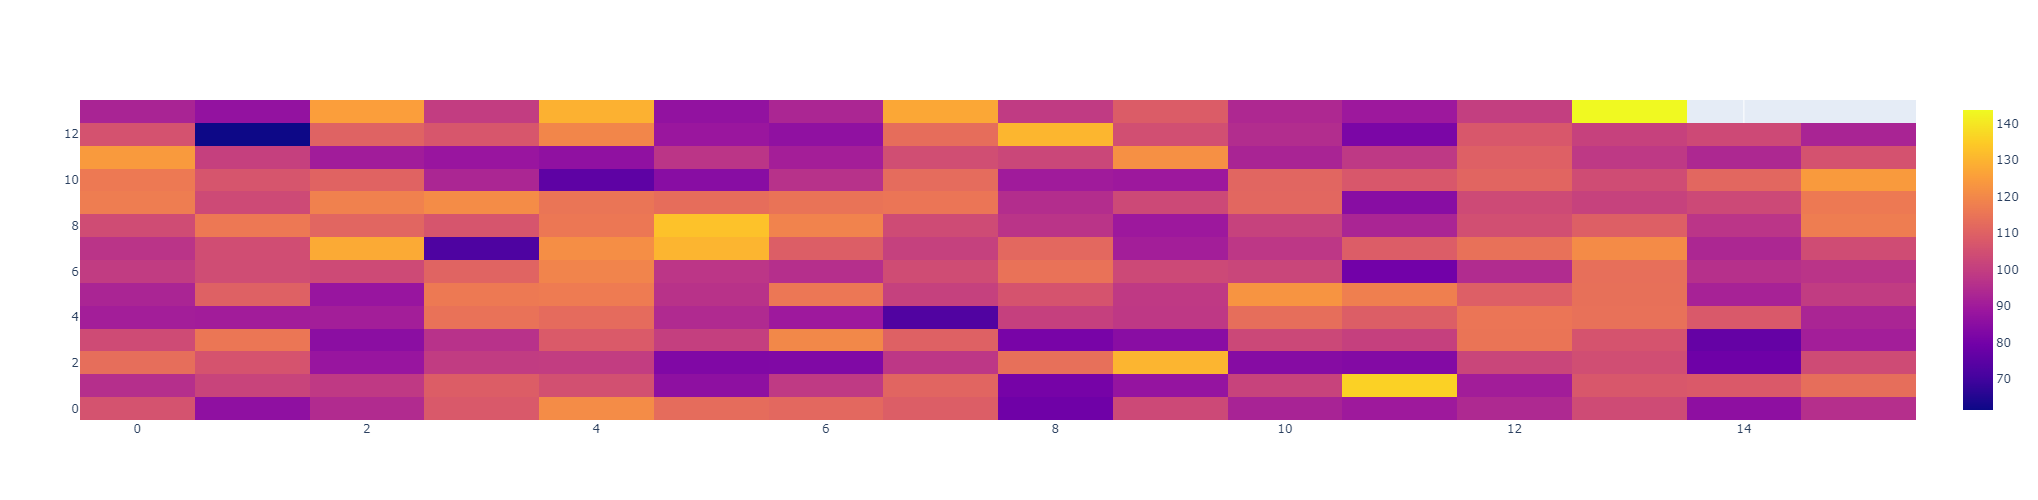

In [146]:
fig = go.Figure(data = go.Heatmap(z = data))
fig.update_layout(width = 800, height = 500)
fig.update_xaxes()
fig.show()